In [ ]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('../data/cleaned/cleaned_addiction.csv')

# Shape and preview
print(df.shape)
print(df.columns)
df.head()


In [ ]:
import pandas as pd
df = pd.read_csv('../data/cleaned/cleaned_addiction.csv')

In [ ]:
df.info()

In [ ]:
%matplotlib inline


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline chart display (Jupyter only)
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
import pandas as pd
df = pd.read_csv('../data/cleaned/cleaned_addiction.csv')


In [ ]:
import os

# Make sure the output folder exists
os.makedirs('../outputs/charts', exist_ok=True)


In [ ]:
plt.savefig('../outputs/charts/usage_distribution.png', dpi=300, bbox_inches='tight')


In [ ]:
import os
os.makedirs('../outputs/charts', exist_ok=True)


In [ ]:
plt.savefig('../outputs/charts/your_filename.png', dpi=300, bbox_inches='tight')


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create output folder if it doesn't exist
os.makedirs('../outputs/charts', exist_ok=True)

# Enable inline charts + set clean style
%matplotlib inline
sns.set(style="whitegrid")

# ==== Chart 1: Distribution of Daily Social Media Usage ====
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_daily_usage_hours'], kde=True, color='darkblue', bins=20)
plt.title('Distribution of Daily Social Media Usage (Hours)', fontsize=16, fontweight='bold')
plt.xlabel('Hours per Day', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.savefig('../outputs/charts/usage_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ==== Chart 2: Usage vs. Addiction Score ====
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='avg_daily_usage_hours', y='addicted_score', hue='gender')
plt.title('Usage Hours vs. Addiction Score by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Daily Usage (hrs)', fontsize=12)
plt.ylabel('Addiction Score', fontsize=12)
plt.legend(title='Gender')
plt.savefig('../outputs/charts/usage_vs_addiction.png', dpi=300, bbox_inches='tight')
plt.show()

# ==== Chart 3: Academic Impact vs Mental Health Score ====
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='affects_academic_performance', y='mental_health_score')
plt.title('Academic Impact vs. Mental Health Score', fontsize=16, fontweight='bold')
plt.xlabel('Affects Academic Performance', fontsize=12)
plt.ylabel('Mental Health Score', fontsize=12)
plt.savefig('../outputs/charts/impact_vs_mental_health.png', dpi=300, bbox_inches='tight')
plt.show()

# ==== Chart 4: Heatmap of Numeric Correlations ====
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.savefig('../outputs/charts/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# === STEP 5: Clustering for Risk Profiling ===

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features to cluster on
features = df[['avg_daily_usage_hours', 'mental_health_score', 'addicted_score']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['risk_cluster'] = kmeans.fit_predict(X_scaled)

# Re-map cluster labels by average addicted_score (0 = low risk, 2 = high)
cluster_risks = df.groupby('risk_cluster')['addicted_score'].mean().sort_values()
remap = {old: new for new, old in enumerate(cluster_risks.index)}
df['risk_cluster'] = df['risk_cluster'].map(remap)

# Preview counts
df['risk_cluster'].value_counts().sort_index()


In [ ]:
import pandas as pd
df = pd.read_csv('../data/cleaned/cleaned_addiction.csv')


In [ ]:
import pandas as pd

# Load cleaned CSV
df = pd.read_csv('../data/cleaned/cleaned_addiction.csv')
df.head()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Select features to cluster on
features = df[['avg_daily_usage_hours', 'mental_health_score', 'addicted_score']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['risk_cluster'] = kmeans.fit_predict(X_scaled)

# Sort clusters low → high risk
cluster_centers = kmeans.cluster_centers_.mean(axis=1)
sorted_clusters = sorted(zip(cluster_centers, range(3)))
remap = {old:new for new, (_, old) in enumerate(sorted_clusters)}
df['risk_cluster'] = df['risk_cluster'].map(remap)

# Preview cluster counts
print("✅ Cluster counts:\n", df['risk_cluster'].value_counts().sort_index())

# Export updated file
os.makedirs('../data/cleaned', exist_ok=True)
df.to_csv('../data/cleaned/clustered_addiction.csv', index=False)
print("✅ Exported: /data/cleaned/clustered_addiction.csv")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure export folder exists
os.makedirs('../outputs/charts', exist_ok=True)

# Plot cluster map
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='avg_daily_usage_hours',
    y='addicted_score',
    hue='risk_cluster',
    palette='coolwarm',
    data=df
)
plt.title('Student Risk Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Daily Usage (hrs)', fontsize=12)
plt.ylabel('Addicted Score', fontsize=12)
plt.legend(title='Risk Level (0=Low, 2=High)')
plt.savefig('../outputs/charts/student_risk_clusters.png', dpi=300, bbox_inches='tight')
plt.show()


In [1]:
import pandas as pd
df = pd.read_csv('../data/cleaned/clustered_addiction.csv')
df.head()


,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score,risk_cluster
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,1
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,0
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,2
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,0
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,1


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['avg_daily_usage_hours', 'mental_health_score', 'addicted_score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['risk_cluster'] = kmeans.fit_predict(X_scaled)

cluster_centers = kmeans.cluster_centers_.mean(axis=1)
sorted_clusters = sorted(zip(cluster_centers, range(3)))
remap = {old:new for new, (_, old) in enumerate(sorted_clusters)}
df['risk_cluster'] = df['risk_cluster'].map(remap)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('../outputs/charts', exist_ok=True)
%matplotlib inline
sns.set(style="whitegrid")


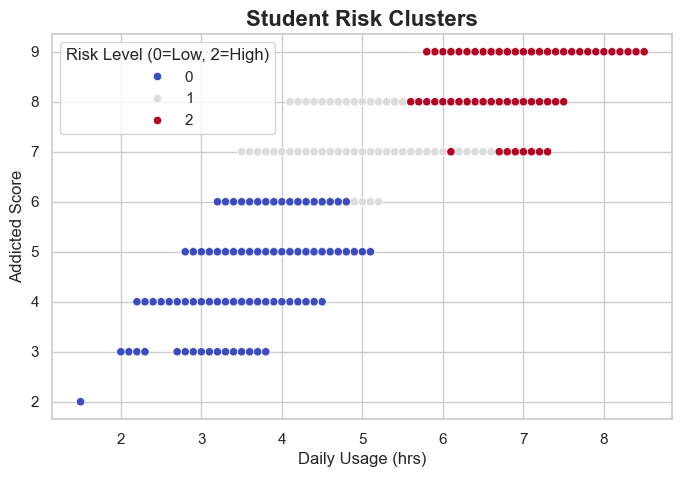

In [4]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='avg_daily_usage_hours',
    y='addicted_score',
    hue='risk_cluster',
    palette='coolwarm',
    data=df
)
plt.title('Student Risk Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Daily Usage (hrs)', fontsize=12)
plt.ylabel('Addicted Score', fontsize=12)
plt.legend(title='Risk Level (0=Low, 2=High)')
plt.savefig('../outputs/charts/student_risk_clusters.png', dpi=300, bbox_inches='tight')
plt.show()


Objective
Identify behavioral risk profiles for social media addiction among students
→ Use those profiles to guide early intervention in schools or wellness programs.

What We Found
Three distinct groups emerged:

Cluster 0 → Low Risk
Students with low usage, low addiction scores, and stable mental health

Cluster 1 → Moderate Risk
Average usage with occasional academic or emotional impact

Cluster 2 → High Risk
High daily usage, high addiction scores, and declining mental health

Key Risk Signals
Students with 6+ hours/day usage were disproportionately in Cluster 2

Higher addicted_score was consistently linked with mental health decline

Academic impact and relationship conflict were strong secondary signals

Actionable Use
Target Cluster 2 students for wellness interventions, digital detox programs, or counseling

Monitor Cluster 1 students more closely over time

Use this clustering model as a decision-support tool for school wellness teams

